# My First Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
klima_gj = pd.read_csv("klima_gj_time.csv", sep=";", decimal = ",", parse_dates=['timeStamp'], index_col="timeStamp")

In [73]:
klima_gj.tail(5)
klima_gj.describe()

,air_temp_avg,nedbor_mm,precipitation_total_bucket,diff_bucket_last_hour
count,17606.000000,17606.000000,17606.000000,17606.000000
mean,-3.407816,0.532898,711.335817,0.817841
std,7.584664,0.659171,133.099211,24.749884
min,-23.000000,0.000000,-99.900000,0.000000
25%,-9.200000,0.100000,611.550000,0.000000
50%,-4.100000,0.300000,713.700000,0.000000
75%,1.800000,0.700000,818.000000,0.100000
max,21.900000,24.300000,967.000000,1036.900000


## Resampling data to experiment faster

I used [this](https://towardsdatascience.com/10-python-pandas-tricks-to-make-data-analysis-more-enjoyable-cb8f55af8c30) article to do my approach.

In [78]:
Gamanjunni_tempair = klima_gj["air_temp_avg"]
Gamanjunni_tempair_w = Gamanjunni_tempair.resample("W").mean().dropna() # Weekly
print(Gamanjunni_tempair_w.head(5))
Gamanjunni_tempair_w.shape
Gamanjunni_tempair_w.describe()

timeStamp
2017-10-15   -3.173377
2017-10-22   -4.142262
2017-10-29   -3.728571
2017-11-05   -5.916667
2017-11-12   -4.513690
Freq: W-SUN, Name: air_temp_avg, dtype: float64


count    107.000000
mean      -3.486602
std        7.003514
min      -16.121429
25%       -8.678869
50%       -4.142262
75%        2.008631
max       14.791071
Name: air_temp_avg, dtype: float64

In [76]:
Gamanjunni_precip = klima_gj['diff_bucket_last_hour'] #diff_bucket_last_hour
#Gamanjunni_precip[Gamanjunni_precip < 0] = 0 # replacing negative values with 0
Gamanjunni_precip = Gamanjunni_precip[Gamanjunni_precip < 100] # Removing values above 100 mm hour
Gamanjunni_precip_w = Gamanjunni_precip.resample('W').sum() # Weekly

print(Gamanjunni_precip_w.tail())

Gamanjunni_precip_w.describe()

timeStamp
2019-09-29    21.1
2019-10-06    25.3
2019-10-13     4.4
2019-10-20     7.8
2019-10-27     3.7
Freq: W-SUN, Name: diff_bucket_last_hour, dtype: float64


count    107.000000
mean      24.640187
std       14.838100
min        0.000000
25%       13.700000
50%       22.900000
75%       32.000000
max       88.000000
Name: diff_bucket_last_hour, dtype: float64

In [80]:
Gamanjunni_GPS3 = pd.read_csv("Gamanjunni_GPS3.csv", sep=";", decimal = ".", parse_dates=['EventTime'], index_col="EventTime")
# Gamanjunni_GPS3.sort_values(by=['EventTime'], inplace=True, ascending=True)
Gamanjunni_GPS3_w = Gamanjunni_GPS3.resample("W").mean().dropna() # Resampled to weekly
#Gamanjunni_GPS3_w['tot_vector'] = (Gamanjunni_GPS3_w['dN']**2 + Gamanjunni_GPS3_w['dE']**2 + Gamanjunni_GPS3_w['dH']**2)**(1/2) # Total vector

# Gamanjunni_GPS3_w['dN'] = Gamanjunni_GPS3_w['dN'][]

Gamanjunni_GPS3_w['2D_vector'] = (Gamanjunni_GPS3_w['dN'].multiply(-1)*np.cos(np.arctan(Gamanjunni_GPS3_w['dE'].multiply(-1)/Gamanjunni_GPS3_w['dN'].multiply(-1)))                               + Gamanjunni_GPS3_w['dE'].multiply(-1)*np.sin(np.arctan(Gamanjunni_GPS3_w['dE'].multiply(-1)/Gamanjunni_GPS3_w['dN'].multiply(-1)))) # 2D vector

Gamanjunni_GPS3_w['3D_vector'] = (Gamanjunni_GPS3_w['2D_vector']*np.cos(np.arctan(Gamanjunni_GPS3_w['dH']/Gamanjunni_GPS3_w['2D_vector'])) 
                              + Gamanjunni_GPS3_w['dH']*np.sin(np.arctan(Gamanjunni_GPS3_w['dH']/Gamanjunni_GPS3_w['2D_vector']))) # 3D vector

# Cheated to avoid oposing values
#Gamanjunni_GPS3_w['3D_vector'] = (Gamanjunni_GPS3_w['dE'].multiply(-1)*np.cos(np.arctan(Gamanjunni_GPS3_w['dH']/Gamanjunni_GPS3_w['dE'])) 
#                              + Gamanjunni_GPS3_w['dH']*np.sin(np.arctan(Gamanjunni_GPS3_w['dH']/Gamanjunni_GPS3_w['dE'].multiply(-1)))) # 3D vector


Gamanjunni_GPS3_w = Gamanjunni_GPS3_w[114:] #Adjusting for starting time to okt 2017
Gamanjunni_GPS3_w = Gamanjunni_GPS3_w - Gamanjunni_GPS3_w.iloc[0] # Starting at 0
#Gamanjunni_GPS3_w['dE_positive'] = Gamanjunni_GPS3_w['dE'].multiply(-1)
Gamanjunni_GPS3_w.head()
Gamanjunni_GPS3_w.describe()

,dN,dE,dH,2D_vector,3D_vector
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-17.339835,-27.631215,-36.247628,163.939862,208.771333
std,8.619355,16.119269,25.200218,69.785357,87.422703
min,-35.417267,-54.348544,-85.470667,-13.978984,-13.438630
25%,-23.431906,-42.240395,-56.078575,173.398472,214.829144
50%,-17.897239,-25.213751,-36.666784,185.062617,233.086326
75%,-12.099249,-14.158597,-21.954629,202.572132,258.995231
max,0.357629,9.470319,27.570234,215.519080,287.088070


In [12]:
Gamanjunni_GPS3.index[1]

Timestamp('2019-10-29 06:00:00')

In [71]:
Gamanjunni_GPS6 = pd.read_csv("Gamanjunni_GPS6.csv", sep=";", decimal = ".", parse_dates=['EventTime'], index_col="EventTime")
Gamanjunni_GPS6_w = Gamanjunni_GPS6.resample("W").mean().dropna() # Resampled to weekly
#Gamanjunni_GPS6_w['tot_vector'] = (Gamanjunni_GPS6_w['dN']**2 + Gamanjunni_GPS6_w['dE']**2 + Gamanjunni_GPS6_w['dH']**2)**(1/2) # Total vector

Gamanjunni_GPS6_w['2D_vector'] = (Gamanjunni_GPS6_w['dN'].multiply(-1)*np.cos(np.arctan(Gamanjunni_GPS6_w['dE'].multiply(-1)/Gamanjunni_GPS6_w['dN'].multiply(-1))) 
                              + Gamanjunni_GPS6_w['dE'].multiply(-1)*np.sin(np.arctan(Gamanjunni_GPS6_w['dE'].multiply(-1)/Gamanjunni_GPS6_w['dN'].multiply(-1)))) # 2D vector

Gamanjunni_GPS6_w['3D_vector'] = (Gamanjunni_GPS6_w['2D_vector']*np.cos(np.arctan(Gamanjunni_GPS6_w['dH']/Gamanjunni_GPS6_w['2D_vector'])) 
                              + Gamanjunni_GPS6_w['dH']*np.sin(np.arctan(Gamanjunni_GPS6_w['dH']/Gamanjunni_GPS6_w['2D_vector']))) # 3D vector

Gamanjunni_GPS6_w = Gamanjunni_GPS6_w[10:] #Adjusting for starting time to okt 2017
Gamanjunni_GPS6_w = Gamanjunni_GPS6_w - Gamanjunni_GPS6_w.iloc[0] # Starting at 0
#Gamanjunni_GPS6_w['dE_positive'] = Gamanjunni_GPS6_w['dE'].multiply(-1)
Gamanjunni_GPS6_w.describe()


,dN,dE,dH,2D_vector,3D_vector
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-15.809122,-20.732864,-40.741916,25.833310,0.553236
std,7.647408,15.196189,15.205404,16.579747,17.784309
min,-28.448673,-47.833922,-64.635975,-4.638645,-55.252352
25%,-21.233225,-33.413345,-52.051014,10.869065,-12.608634
50%,-16.432480,-18.736272,-40.559021,24.216634,-0.936616
75%,-10.614252,-5.593911,-33.171920,39.206263,13.907704
max,0.219025,2.385199,1.071493,55.304528,32.578353


In [70]:
Gamanjunni_GPS9 = pd.read_csv("Gamanjunni_GPS9.csv", sep=";", decimal = ".", parse_dates=['EventTime'], index_col="EventTime")
Gamanjunni_GPS9_w = Gamanjunni_GPS9.resample("W").mean().dropna() # Resampled to weekly
#Gamanjunni_GPS9_w['tot_vector'] = (Gamanjunni_GPS9_w['dN']**2 + Gamanjunni_GPS9_w['dE']**2 + Gamanjunni_GPS9_w['dH']**2)**(1/2) # Total vector

Gamanjunni_GPS9_w['2D_vector'] = (Gamanjunni_GPS9_w['dN'].multiply(-1)*np.cos(np.arctan(Gamanjunni_GPS9_w['dE'].multiply(-1)/Gamanjunni_GPS9_w['dN'].multiply(-1))) 
                              + Gamanjunni_GPS9_w['dE'].multiply(-1)*np.sin(np.arctan(Gamanjunni_GPS9_w['dE'].multiply(-1)/Gamanjunni_GPS9_w['dN'].multiply(-1)))) # 2D vector

Gamanjunni_GPS9_w['3D_vector'] = (Gamanjunni_GPS9_w['2D_vector']*np.cos(np.arctan(Gamanjunni_GPS9_w['dH']/Gamanjunni_GPS9_w['2D_vector'])) 
                              + Gamanjunni_GPS9_w['dH']*np.sin(np.arctan(Gamanjunni_GPS9_w['dH']/Gamanjunni_GPS9_w['2D_vector']))) # 3D vector

Gamanjunni_GPS9_w = Gamanjunni_GPS9_w[34:] #Adjusting for starting time to okt 2017
Gamanjunni_GPS9_w = Gamanjunni_GPS9_w - Gamanjunni_GPS9_w.iloc[0] # Starting at 0
#Gamanjunni_GPS9_w['dE_positive'] = Gamanjunni_GPS9_w['dE'].multiply(-1)
Gamanjunni_GPS9_w.head()
Gamanjunni_GPS9_w.describe()

,dN,dE,dH,2D_vector,3D_vector
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-9.643185,-6.084878,-10.941876,10.703833,14.015698
std,5.682110,8.939605,13.287505,9.956861,15.822524
min,-19.789180,-25.585180,-37.470830,-8.559068,-24.130579
25%,-12.265473,-11.036796,-19.187759,4.142181,5.072919
50%,-9.180677,-2.747192,-9.314474,7.780087,11.609424
75%,-7.082866,-0.169204,-3.995891,15.019381,23.699257
max,3.075500,13.211867,22.928251,31.656638,43.970779


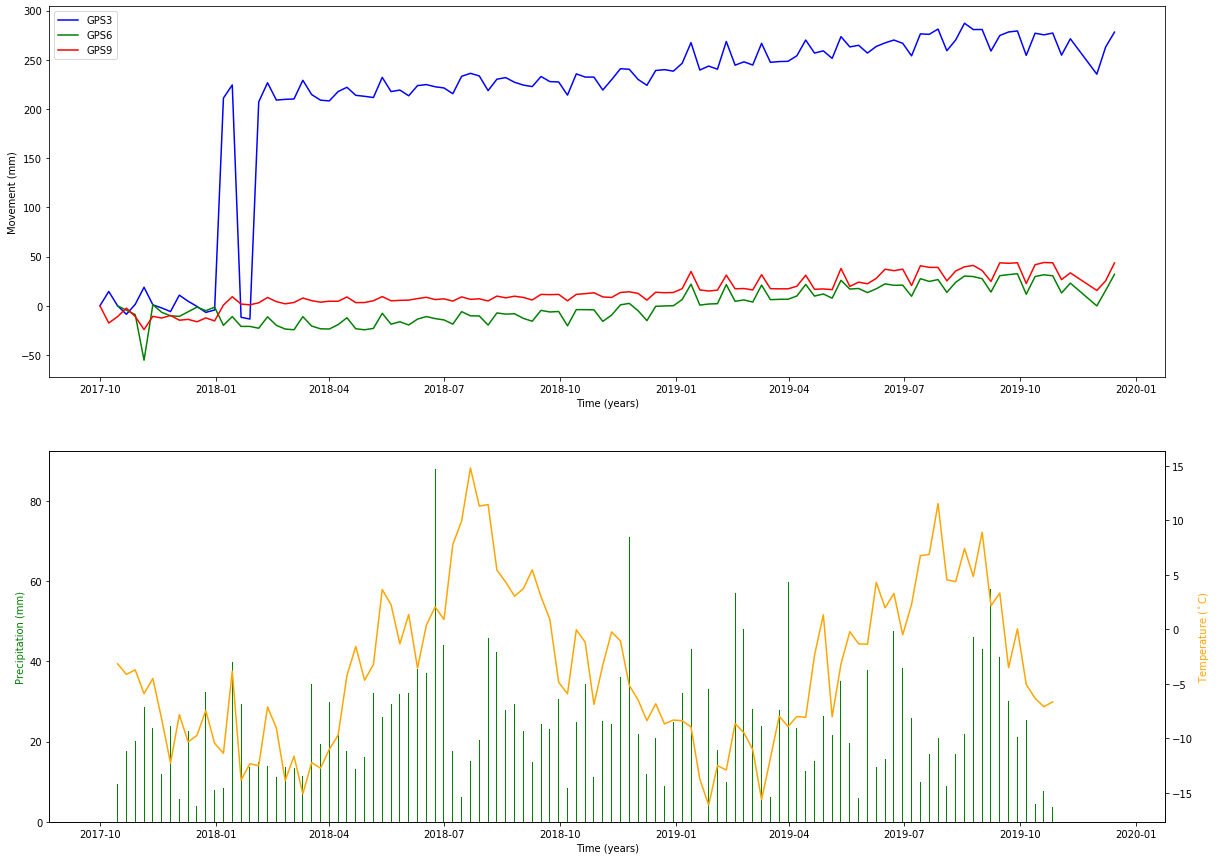

In [81]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(211)

ax1.plot(Gamanjunni_GPS3_w['3D_vector'].index, Gamanjunni_GPS3_w['3D_vector'], label="GPS3", color="blue")
ax1.plot(Gamanjunni_GPS6_w['3D_vector'].index, Gamanjunni_GPS6_w['3D_vector'], label="GPS6", color='green')
ax1.plot(Gamanjunni_GPS9_w['3D_vector'].index, Gamanjunni_GPS9_w['3D_vector'], label="GPS9", color='red')
ax1.set_ylabel("Movement (mm)", color='black')
ax1.set_xlabel('Time (years)')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(212, sharex = ax1) # Share x-axis for both subplots

lg_ins1 = ax2.bar(Gamanjunni_precip_w.index, Gamanjunni_precip_w.values, label="Precip", color="green")
ax2a = ax2.twinx()
lg_ins2 = ax2a.plot(Gamanjunni_tempair_w.index, Gamanjunni_tempair_w.values, label="Temp", color='orange')

# Making legend for both y-axis
# lines, labels = ax2.get_legend_handles_labels()
# lines2, labels2 = ax2a.get_legend_handles_labels()
# ax2.legend(lines + labels, lines2 + labels2, loc='upper left')

ax2.set_ylabel("Precipitation (mm)", color='green')
ax2a.set_ylabel("Temperature ($^\circ$C)", color='orange')
ax2.set_xlabel('Time (years)')

# ax2a.set_yticks(np.arange(0, 0.2, 20))
# ax2.set_ylim(0,10)

# plt.grid()

# fig.set_size_inches(6, 4) 
fig.savefig('Gamanjunni_3D.png', dpi=300, bbox_inches='tight')

plt.show()

# Get total displacement on y instead of movement per day.
# Plot total movement vector, or both north and east? 

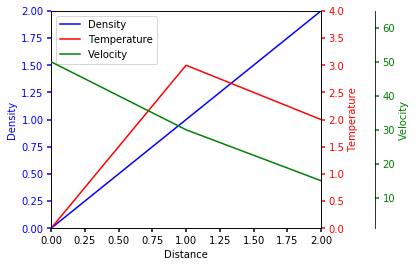

In [144]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

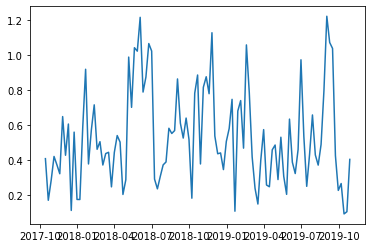

In [112]:
plt.plot(gamanjunni_data['nedbor_mm'])

(array([219., 188., 133.,  75.,  57.,  36.,  20.,   8.,   2.,   1.]),
 array([0.     , 0.23875, 0.4775 , 0.71625, 0.955  , 1.19375, 1.4325 ,
        1.67125, 1.91   , 2.14875, 2.3875 ]),
 <a list of 10 Patch objects>)

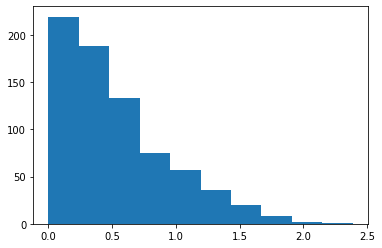

In [98]:
counts, bins = np.histogram(gamanjunni_data['nedbor_mm'].dropna())
plt.hist(bins[:-1], bins, weights=counts)

In [95]:
gamanjunni_data['nedbor_mm'].isna().sum()

5

In [97]:
gamanjunni_data['air_temp_avg'].isna().sum()

5

<BarContainer object of 744 artists>

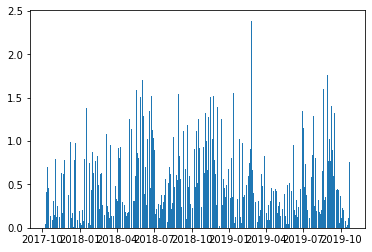

In [100]:
plt.bar(gamanjunni_data['nedbor_mm'].index, gamanjunni_data['nedbor_mm'].values)